# 1. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. A programok legyenek modulárisak, használjanak függvényeket! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

Az előre megadott cellákon ne változtassunk!

Segítségül itt összefoglaljuk a kapcsolódó elméletet.

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## Az illeszkedés jósága: a redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \lesssim 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{1}{2}\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ik} X_{il} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a jackknife és a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét.
Tehát ha a teljes mérést tudjuk sokszor ismételni valóságban, vagy szimulációban, akkor meg tudjuk határozni a paraméterek eloszlását és hibáját.
Általában erre nincs lehetőségunk, egyetlen mérés adatsorából kell dolgoznunk. Viszont tudunk mesterséges adatsorokat készíteni a mért adatsorunkból. Ezeken vizsgálva a paraméterek elsozlását következtethetünk a valódi mérés paramétereinek pontosságára.
Két ilyen módszert fogunk kipróbálni:

A jackknife módszer esetében egy-egy mérési pontot kihagyunk az eredeti adatsorból. $N$ pont esetén ezt $N$-féleképpen tehetjük meg, így ennyi mesterséges adatsort kapunk. Mindegyikre elvégezve az illesztést így kapunk becslést a paraméterekre és pontosságukra:
$$ \mathbf{a}_{\rm jack} = \frac{1}{N} \sum_i \mathbf{a}_{(i)}\;,\;\;\;
\sigma_{{\rm jack},k}^2 = \frac{N-1}{N} \sum_i (a_{(i),k}-a_{{\rm jack},k})^2\;\;,\;\;
$$
ahol $\mathbf{a}_{(i)}$ az $i$-dik mesterséges adatsorra illesztve kapott paramétervektor és $a_{(i),k}$ ennek a k-ik 
komponense. 

Másik gyakran használt, egyszerű eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az adatokból visszatevéses véletlen mintavételezéssel új, az eredetivel azonos hosszúságú ${\cal D}^{(S)}_1$ mesterséges adatsort hozunk létre. Az illesztést az új adatsorra is elvégezzük. Majd az eredeti adatsorból a mintavételezést és mindegyik kapott ${\cal D}^{(S)}_i$ adatsorra az illesztést megismételjük.
Kellően sokszor megismételve az eljárást a kapott $\mathbf{a}^{(S)}_{(i)}$ illesztési paramétervektorok egy eloszlást adnak az eredeti adatsorra illesztett $\mathbf{a}_{(0)}$ körül. És ez az eloszlás közel áll ahhoz, amit az eredeti mérés ismétlésével kapnánk az $\mathbf{a}^{(R)}_{(i)}$ illesztett paraméterekre az ismeretlen valódi $\mathbf{a}_{\rm true}$ vektor körül, azaz
$ \mathbf{a}^{(S)}_{(i)} - \mathbf{a}_{(0)} $   és   $ \mathbf{a}^{(R)}_{(i)} - \mathbf{a}_{\rm true} $ eloszlása hasonló.
Így $\mathbf{a}^{(S)}_{(i)}$ szórása jól jellemzi az $\mathbf{a}_{(0)}$ pontosságát.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## Alap 1. feladatrész

Az alábbi függvény egy véletlenszerű adatsort generál, mérési folyamatot szimulál. Az előre megadott cellákon ezért ne változtassunk!
Írjunk egy 'myfit' függvényt, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a függvényt, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen!
Teljes pontszámért úgy írjuk meg a függvényt, hogy vektorosan kezeljük az adatokat, azaz a tervmátrix egy oszlopát (vagy sorát) egyszerre hozzuk létre, ne két egymásba ágyazott ciklussal. Az ügyesebbek teljesen mellőzni tudják a for ciklust.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(N, M=0):
    a = ( np.random.rand() + 1 ) / 5 * np.random.choice([-1,1])
    b = ( np.random.rand() + 1 ) * np.random.choice([-1,1])
    c = - 32 * ( np.random.rand() + 1 ) * a
    x = np.linspace(-10, 10, N)
    sigma = 2 * (np.random.rand(N) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    if M>0:
        idx = random.choice(range(N),M,replace=False)                     # ne legyen ismétlés
        y[idx] = np.min(y) + np.random.rand(M) * (np.max(y) - np.min(y))  # ne legyenek egyformák
    return x, y, sigma

In [2]:
x, y, sigma = random_data(101)

<ErrorbarContainer object of 3 artists>

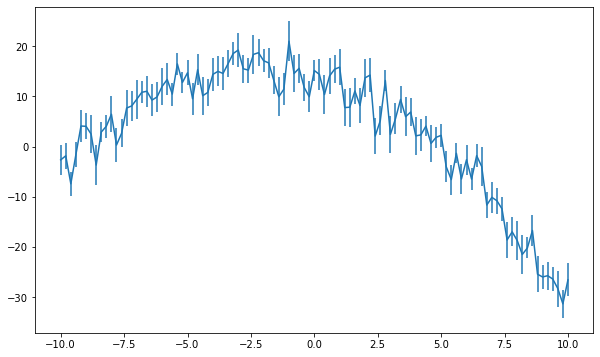

In [3]:
# ábra a mérési pontokkal és hibaintervallumokkal
plt.figure(figsize=(10,6))
plt.errorbar(x,y,yerr=sigma)


array([[ 1.46596168e+01],
       [-1.31238543e+00],
       [-3.24150871e-01],
       [-5.25888808e-04]])

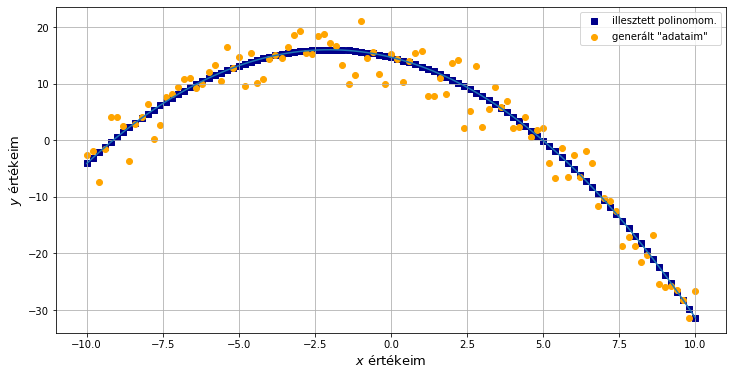

In [4]:
from tqdm.auto import tqdm
from sympy import *
def myfit(x,y,sigma,polinom): # hogy akármekkora polinommal menjen, a használót kérem meg adja meg mennyit akar
    xek=[]  # egyszer egy lista amibe gyüjtöm a számokat
    x2=np.linspace(-10, 10, len(x)) # csinálok egy új listát, hogy rengetegszer le tudjam majd futtatni
    b=[]
    x3=[]
    for i in range(0,polinom):
        xek.append((x2**i)) # gyüjtöm a számokat
    M=np.array(np.matrix(xek).T) # legyen egy arrayes lista belőle
    for j in range(len(x)): #nekem kell az, hogy mindegyik érték egyedi szigmával le legyen osztva
        x3.append(M[j]/sigma[j])
        b.append(y[j]/sigma[j])
    M2=np.matrix(x3)
    B=np.matrix(b) # akarok vele "mátrixszorozni" de egy "egy dimenziós mátrix" az vektor lényegében
    M3=M2.T 
    M4=M3*M2 # ez a bal oldala az egyenletnek
    M5=M3*B.T #  ez a jobb fele az egyenletnek
    a=np.array(np.linalg.solve(M4,M5))
    fx=[] #a listám amibe számolom a megoldást
    for h in range(0,len(x)): # minden x értékhez a fgv értéket akarom
        fz=0 # egy alapérték
        for k in range(0,len(a)): # mennyi polinom kéne létezzen? há mittomén de végigmegyek minden
            fz+=a[k]*x[h]**k # összeadogatom 
        fx.append(fz) # hozzáadom a listámhoz
    plt.figure(figsize=(12,6)) # véletlen sem laborról másolt plotolás
    plt.plot(x,fx) 
    plt.scatter(x,fx,marker="s",c="darkblue",label='illesztett polinomom.')
    plt.xlabel("$x$ értékeim",fontsize=13)
    plt.ylabel("$y$ értékeim",fontsize=13)
    plt.scatter(x,y,marker='o',c="orange",label='generált "adataim"')
    plt.grid()
    plt.legend()
   # for n in  range(polinom):  szép ha csak ezt futtatom le, de az utolsó részben túl sokszor printelne
    #    print("az a[",n,"]=",a[n])
    return(a) # nem lenne jobb az M4-el visszatérnem, hogy ezzel számoljak a kövi feladatban? de ez szebb...
myfit(x,y,sigma,4)
    
    
    
    

In [5]:
# az illesztést elvégző program helye


array([[14.65718863],
       [-1.34443291],
       [-0.324021  ]])

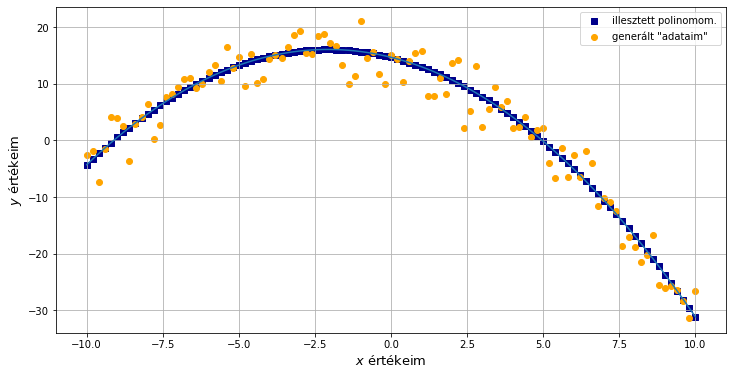

In [6]:
# ábra a másodfokú illesztéssel
myfit(x,y,sigma,3)

## Alap 2. feladatrész

Írjuk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

In [7]:
# a szórások és aszimptotikus hibák meghatározása
def myfit2(x,y,sigma,polinom):
    xek=[]  # egyszer egy lista amibe gyüjtöm a számokat
    x2=np.linspace(-10, 10, len(x)) # csinálok egy új listát, hogy rengetegszer le tudjam majd futtatni
    b=[]
    x3=[]
    for i in range(0,polinom):
        xek.append((x2**i)) # gyüjtöm a számokat
    M=np.array(np.matrix(xek).T) # legyen egy arrayes lista belőle
    for j in range(len(x)): #nekem kell az, hogy mindegyik érték egyedi szigmával le legyen osztva
        x3.append(M[j]/sigma[j])
        b.append(y[j]/sigma[j])
    M2=np.matrix(x3)
    B=np.matrix(b) # akarok vele "mátrixszorozni" de egy "egy dimenziós mátrix" az vektor lényegében
    M3=M2.T 
    M4=M3*M2 # ez a bal oldala az egyenletnek
    M5=M3*B.T #  ez a jobb fele az egyenletnek
    C2=M4**(-1)
    C=Matrix(C2)
    for q in range(polinom):
        print("Az a[",q,"] aszimptotikus hibája:",sqrt(C[q*polinom+q]))
    for e in range(polinom):
        for s in range(polinom):
            print("a kovarianciája :cov(",e+1,",",s+1,")=",C[e*polinom+s])
    return(C)
myfit2(x,y,sigma,4)

Az a[ 0 ] aszimptotikus hibája: 0.436974233263749
Az a[ 1 ] aszimptotikus hibája: 0.118856925051326
Az a[ 2 ] aszimptotikus hibája: 0.00942673603588620
Az a[ 3 ] aszimptotikus hibája: 0.00178654640969997
a kovarianciája :cov( 1 , 1 )= 0.190946480536442
a kovarianciája :cov( 1 , 2 )= 0.000534133465239878
a kovarianciája :cov( 1 , 3 )= -0.00313524175382423
a kovarianciája :cov( 1 , 4 )= -1.47373952739795e-5
a kovarianciája :cov( 2 , 1 )= 0.000534133465239878
a kovarianciája :cov( 2 , 2 )= 0.0141269686326566
a kovarianciája :cov( 2 , 3 )= -3.94445586314758e-5
a kovarianciája :cov( 2 , 4 )= -0.000194504037840208
a kovarianciája :cov( 3 , 1 )= -0.00313524175382423
a kovarianciája :cov( 3 , 2 )= -3.94445586314758e-5
a kovarianciája :cov( 3 , 3 )= 8.88633522902755e-5
a kovarianciája :cov( 3 , 4 )= 7.88225588712542e-7
a kovarianciája :cov( 4 , 1 )= -1.47373952739795e-5
a kovarianciája :cov( 4 , 2 )= -0.000194504037840208
a kovarianciája :cov( 4 , 3 )= 7.88225588712542e-7
a kovarianciája :cov( 

Matrix([
[   0.190946480536442,  0.000534133465239878, -0.00313524175382423,  -1.47373952739795e-5],
[0.000534133465239878,    0.0141269686326566, -3.94445586314758e-5, -0.000194504037840208],
[-0.00313524175382423,  -3.94445586314758e-5,  8.88633522902755e-5,   7.88225588712542e-7],
[-1.47373952739795e-5, -0.000194504037840208,  7.88225588712542e-7,   3.19174807401185e-6]])

Az előbbi hibaszámítás akkor is kicsi hibát ad, ha a szükségesnél kisebb fokszámú polinomot illesztünk, pl. a parabola mentén elhelyezkedő adatokra egyenest. Ezt felfoghatjuk úgy, hogy ez a módszer azt ondja meg, mekkokra szórása adódik az illesztett paramétereknek csupán a mérési adatok bizonytalanságából.
Viszont...
3a Jackknife, b bootstrap
4 red. khin^2 (n)
szorg.:
5 bootstrap konfidencia
6 validációs
7 többváltozós big nélkül

## Teljes 3. feladatrész
a) Határozzuk meg az illesztett parabola paramétereinek értékét és a paraméterértékek szórásnégyzetét a jacknife módszer segítségével!
Egymás után kiíratva a kovarianciamátrixból számolt és itt kapott eredményeket hasonlítsuk őket össze!

b) A bootstrap eljárás segítségével készítsünk 1000-2000 közötti számú új adathalmazt az eredeti adatokból és végezzük el mindegyikre a parabola illesztést!  A kapott illesztési paraméterek eloszlásáról készítsünk hisztogramot és ennek segítségével számítsuk ki a paraméterek várható értékét és szórásnégyzetét!
Bővítsük az a) pontbeli összehasonlítást az itt kapott eredményekkel!

c) Scatter ploton ábrázoljuk, hogy a boostrap módszer alapján hogyan oszlanak el és mennyire korrelálnak az egyes polinomegyütthatók egymással!

  0%|          | 0/101 [00:00<?, ?it/s]

Jacknife megodásom:a [ 0 ]= 14.6570336500668
Jacknife megodásom:a [ 1 ]= -1.34443628448101
Jacknife megodásom:a [ 2 ]= -0.324017102823120
A jacknife szórásnégyzete:a [ 0 ]= 0.194254780605997
A jacknife szórásnégyzete:a [ 1 ]= 0.00216562214712695
A jacknife szórásnégyzete:a [ 2 ]= 9.43172889150128e-5
Az a[ 0 ] aszimptotikus hibája: 0.436896364060365
Az a[ 1 ] aszimptotikus hibája: 0.0476860459475241
Az a[ 2 ] aszimptotikus hibája: 0.00941640558822145
a kovarianciája :cov( 1 , 1 )= 0.190878432929167
a kovarianciája :cov( 1 , 2 )= -0.000363958370821985
a kovarianciája :cov( 1 , 3 )= -0.00313160224600702
a kovarianciája :cov( 2 , 1 )= -0.000363958370821985
a kovarianciája :cov( 2 , 2 )= 0.00227395897810938
a kovarianciája :cov( 2 , 3 )= 8.58963961301732e-6
a kovarianciája :cov( 3 , 1 )= -0.00313160224600702
a kovarianciája :cov( 3 , 2 )= 8.58963961301732e-6
a kovarianciája :cov( 3 , 3 )= 8.86686942018881e-5


Matrix([
[    0.190878432929167, -0.000363958370821985, -0.00313160224600702],
[-0.000363958370821985,   0.00227395897810938,  8.58963961301732e-6],
[ -0.00313160224600702,   8.58963961301732e-6,  8.86686942018881e-5]])

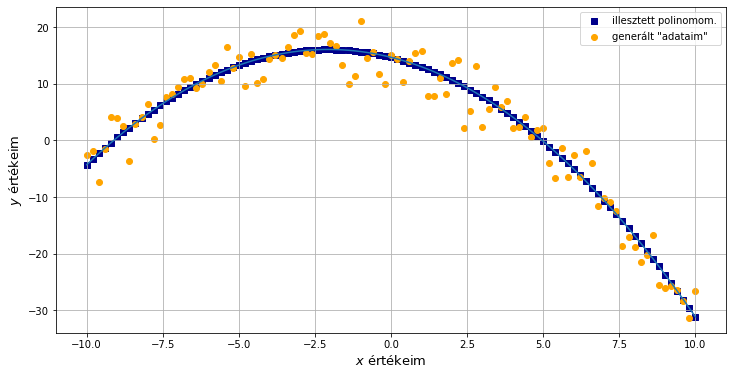

In [8]:
# jacknife módszer megvalósítása, paraméter értékek és szórásnégyzeteik számolása
def myfit3(x,y,sigma,polinom): # hogy akármekkora polinommal menjen, a használót kérem meg adja meg mennyit akar
    ajaim=[]
    for c in tqdm(range(len(x))):
        xek=[]  # egyszer egy lista amibe gyüjtöm a számokat
        x2=np.linspace(-10, 10, len(x)) # csinálok egy új listát, hogy rengetegszer le tudjam majd futtatni
        b=[]
        x3=[]
        for i in range(0,polinom):
            xek.append((x2**i)) # gyüjtöm a számokat
        M=np.array(np.matrix(xek).T) # legyen egy arrayes lista belőle
        for j in range(len(x)): #nekem kell az, hogy mindegyik érték egyedi szigmával le legyen osztva
            x3.append(M[j]/sigma[j])
            b.append(y[j]/sigma[j])
        b=np.delete(b,c)
        M2=np.matrix(x3)
        M22=Matrix(M2)
        M23= np.delete(M22, c, 0)
        B=np.matrix(b) # akarok vele "mátrixszorozni" de egy "egy dimenziós mátrix" az vektor lényegében
        M3=M23.T 
        M32=Matrix(M3)
        M4=M32*M23 # ez a bal oldala az egyenletnek
        M5=M32*B.T #  ez a jobb fele az egyenletnek
        a=symbols('a')
        a=M4.solve(M5)
        ajaim.append(a)
    average=[]
    ajaim2=Matrix(ajaim)
    Sigma2=[]
    for v in range(polinom):
        e=0
        for n in range(len(x)):
            e+=ajaim[n][v]/len(x)
        print("Jacknife megodásom:a [",v,"]=",e)
        average.append(e)
    N=((len(x)-1)/len(x))
    Ak=[]
    for z in range(polinom):
        Ab=0
        for f in range(len(x)):
            cica=ajaim[f][z]
            Ab+=(cica-average[z])**2
        Ab=Ab*N
        Ak.append(Ab)
    for mittoménmár in range(polinom):
        print("A jacknife szórásnégyzete:a [",mittoménmár,"]=",Ak[mittoménmár])
    return()
myfit3(x,y,sigma,3)
myfit(x,y,sigma,3)
myfit2(x,y,sigma,3)

In [ ]:
def myfit4(x,y,sigma,polinom):
    N=np.random.randint(1000,2000)
    ajaim=[]
    for i in tqdm(range(N)):
        xuj,yuj,suj=[],[],[]
        for j in range(len(x)):
            R=np.random.randint(len(x))
            xuj.append(x[R])
            yuj.append(y[R])
            suj.append(sigma[R])
        xuj2=np.array(xuj)
        xek,b,x3=[],[],[]
        for i in range(0,polinom):
            xek.append((xuj2**i)) # gyüjtöm a számokat
        M=np.array(np.matrix(xek).T) # legyen egy arrayes lista belőle
        for j in range(len(x)): #nekem kell az, hogy mindegyik érték egyedi szigmával le legyen osztva
            x3.append(M[j]/suj[j])
            b.append(y[j]/suj[j])
        M2=np.matrix(x3)
        M22=Matrix(M2)
        B=np.matrix(b) # akarok vele "mátrixszorozni" de egy "egy dimenziós mátrix" az vektor lényegében
        M3=M22.T 
        M32=Matrix(M3)
        M4=M32*M22 # ez a bal oldala az egyenletnek
        M5=M32*B.T #  ez a jobb fele az egyenletnek
        a=symbols('a')
        a=M4.solve(M5)
        ajaim.append(a)
    ajaim2=np.array(ajaim,dtype=float)
    return(ajaim2)
sajt=myfit4(x,y,sigma,3)
myfit(x,y,sigma,3)

  0%|          | 0/1770 [00:00<?, ?it/s]

In [ ]:
def expect(x,y):
    kukac=[]
    for i in range(len(y)):
        kukac.append(y[i]/sum(y))
    sajtkukac=0
    for j in range(0,len(y)):
        sajtkukac+=(x[i]*kukac[i])
    return sajtkukac

In [ ]:
def szor(x,y):
    almakukac=[]
    for i in range(len(x)):
        almakukac.append((x[i]-y)**2)
    alma=sum(almakukac)/len(x)
    return (alma)

In [ ]:
a0 = sajt[:,0]
y1,x1,patches0=plt.hist(a0,bins=21)
print(len(y1),len(x1))
ertekem=expect(x1,y1)
print("a várható értéke az a0-nak:",ertekem,"a szórásom meg:",szor(x1,ertekem))

Nemtudom ez miért ilyen hülye mindig, de a többi meg jó

In [ ]:
a1=sajt[:,1]
y2,x2,patches0=plt.hist(a1,bins=21)
print(len(y1),len(x1))
ertekem2=expect(x2,y2)
print("a várható értéke az a0-nak:",ertekem2,"a szórásom meg:",szor(x2,ertekem2))


In [ ]:
a3=sajt[:,2]
y3,x3,patches0=plt.hist(a3,bins=21)
print(len(y1),len(x1))
ertekem3=expect(x3,y3)
print("a várható értéke az a3-nak:",ertekem3,"a szórásom meg:",szor(x3,ertekem3))

a szórásom kisebb(már ahol, de átlagban)

In [ ]:
# scatter plots
plt.scatter(a0,a1)


In [ ]:
plt.scatter(a0,a3)

In [ ]:
plt.scatter(a1,a3)

## Teljes 4. feladatrész

A redukált $\chi^2$ érték segítségével próbáljuk eldönteni, hogy az adataink hanyadfokú polinomot követnek valójában! Számítsuk ki $n=1\ldots7$ közötti fokszámú polinom illesztésére a redukált $\chi^2$ értékeket és ábrázoljuk őket  $n$ függvényében! Próbáljuk ennek segítségével leolvasni a tényleges fokszámot!

Idemásolva az adatsort generáló utasítást, azt is próbáljuk ki, milyen gyakran következtetnénk $n=2$-re!


In [ ]:
# a redukált chi^2 értékét számoló függvény
def myfitsok(x,y,sigma,polinom):
    a=myfit(x,y,sigma,polinom)
    summa=0
    for i in range(len(x)):
        xjeim=0
        for k in range(polinom):
            xjeim+=a[k]*x[i]**k
        xjeim-=y[i]
        summa+=(xjeim**2)/(sigma[i]**2)
    v=len(x)-polinom
    
    return(summa/v)
myfitsok(x,y,sigma,4)

In [ ]:
# modell választás próba
# nézzük meg chi2r értékét n függvényében
n=[1,2,3,4,5,6,7]
M=[]
for j in range(2,9):
    M.append(myfitsok(x,y,sigma,j))
print(M.index(min(M))+1)
plt.figure(figsize=(12,6)) # véletlen sem laborról másolt plotolás
plt.plot(n,M) 
plt.xlabel("fokszámom",fontsize=13)
plt.ylabel("redukált $\chi^2$",fontsize=13)
plt.grid()
plt.plot(n,M)


In [ ]:
cuccli=[]
a2=[]
for z in tqdm(range(100)):
    x, y, sigma = random_data(101)
    M=[]
    for j in range(2,9):
        M.append(myfitsok(x,y,sigma,j))
    cuccli.append(M.index(min(M))+1)
for s in tqdm(range(1,8)):
    a2.append(cuccli.count(s))

In [ ]:
print(a2)

# Tapasztalatok:
átlagban 2 a nyerő szám

## <font color='green5'>5. Szorgalmi feladatrész</font>
Alkalmazzuk a "Modell választás" anyagrészben leírt módszert!
Az adathalmazból minden második pontot a traning halmazba, a maradékot a validációs halmazba téve számoljuk ki az $n$-edfokú polinom illesztési együtthatókat a training halmazon, majd a kiszámolt illesztési együtthatókkal határozzuk meg a validációs halmazra vonatkozó $\chi^2$ értéket. Ne normáljunk a redukált $\chi^2$ értékhez hasonlóan! Ábrázoljuk ezt is $n$ függvényében, és próbáljuk megállapítani a valódi fokszámot! Könnyebben tudunk-e következtetni a fokszámra, mint a 4-es feladatrész esetén?

Idemásolva az adatsort generáló utasítást, azt is próbáljuk ki, milyen gyakran lesz a minimum az $n=2$ közelében!

In [ ]:
# a training és validációs halmaz létrehozása és számolások


In [ ]:
# Tapasztalatok:


## <font color='green5'>6. Szorgalmi feladatrész</font>

A 3-ik feladatrészben kaptunk egy eloszlást a paraméter vektorra a szintetikus adatsorok segítségével. Az eloszlás elemei szintetikus adatsorokra való illesztéssel kapott $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok. Ezek segítségével

a) Határozzuk meg a 95\%-os konfidencia intervallumokat az eredeti adatsorra való illesztésből kapott $\mathbf{a}_{(0)}$ paraméterekre. Tehát keressük meg minden $k$-ra azt az intervallumot, amelyre igaz, hogy a pontok 2.5\%-a van rajta kívül pozitív és negatív irányba egyaránt!
Ezzel tudjuk becsülni az $a_{(0)k}$ érték alapján a minket érdeklő valódi $a_{{\rm (true)}k}$ értéket.

b) Határozzunk meg a 95%-os konfidencia-tartományt a 3 dimenziós paramétertérben! Ezt a tartományt most az eredeti adatsorral generált $\chi^2$ függvény segítségével határozzuk meg. Keressük meg tehát azt a $\chi^2$ határértéket, melyre igaz, hogy az $\mathbf{a}_{(i)}^{(S)}$ paraméter vektorok 95%-ához tartozik ennél kisebb $\chi^2$ érték! Ez azt jelenti, hogy minden $\mathbf{a}_i^{(S)}$-hez kiszámoljuk a $\chi^2$ értéket, ezeket sorrendezve leolvashatjuk a határértéket. Utána ábrázoljuk a paramétervektorokat az $a_k,a_l$ vetületekben úgy, hogy a hatérték alatti és feletti $\chi^2$-tel rendelkezők eltérő színűek legyenek. Határozzuk meg azt is, hogy az $a_k$ értékek milyen intervallumába esnek a belső pontok, majd hasonlítsuk össze az így kapott intervallumokat az a)-beliekkel.

In [ ]:
# konfidencia intervallum számolás


In [ ]:
# konfidencia tartomány számolás


## <font color='green5'>7. Szorgalmi feladatrész</font>

A fiznum2.public direktoriban található **small.dat** fájl olyan adatokat tartalmaz, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével.
A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja a változók egész kitevőjű hatványainak szorzata. Egy tag fokszáma a benne szereplő hatványkitevők összege. A többváltozós polinom fokszáma pedig a legnagyobb fokszámú tagjának fokszáma. Például a
$$ p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3 $$
háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztést kétféleképp próbálhatjuk megírni:

a) Feltételezzük, hogy a függvény a független változók külön-külön függvényeinek összegeként közelíthető, ezért kihagyjuk a vegyes tagokat.

b) Figyelembe vesszük a vegyes tagokat is, így viszont a fokszám növekedtével gyorsan nő a polinom tagjainak száma.

Próbáljuk meg a 2-od és a 3-adfokú illesztést! Utána határozzuk meg az illesztési paraméterek hibáit!
Grafikus ellenőrzésképpen ábrázoljuk a függő változó mért értékei függvényében az illesztett értékeket!
Vegyük észre, hogy széles sávban beszínezett képet kapunk, és nem látszik, hogy azon belül hogyan változik a pontok sűrűsége! Ezen pl. úgy tudunk javítani, hogy csak minden m-dik pontot ábrázoljuk, megfelelő $m$ bejátszásával!
Először saját kis próbafájllal teszteljük a függvényeinket, azután használjuk a következő adatfájlokat:

A **small.dat** fájlt  ne másoljuk át a saját kooplexes mappába, hanem olvassuk közvetlenül a megfelelő
elérési útat megadva, pl. np.loadtxt("/v/courses/fiznum2.public/small.dat") !

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba

In [ ]:
# többváltozós illesztés
